In [1]:
import glob
import os
import re
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import lightgbm as lgb

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../processed_data/train_v11.csv')

In [4]:
len(train[train['high_price_flag']==1])

254

In [34]:
mdl = lgb.Booster(model_file='../mdl/1011_lgbm_2.txt')
feature_importances = pd.DataFrame()
feature_importances['feature'] = mdl.feature_name()
feature_importances['importance'] = mdl.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(len(feature_importances))


48


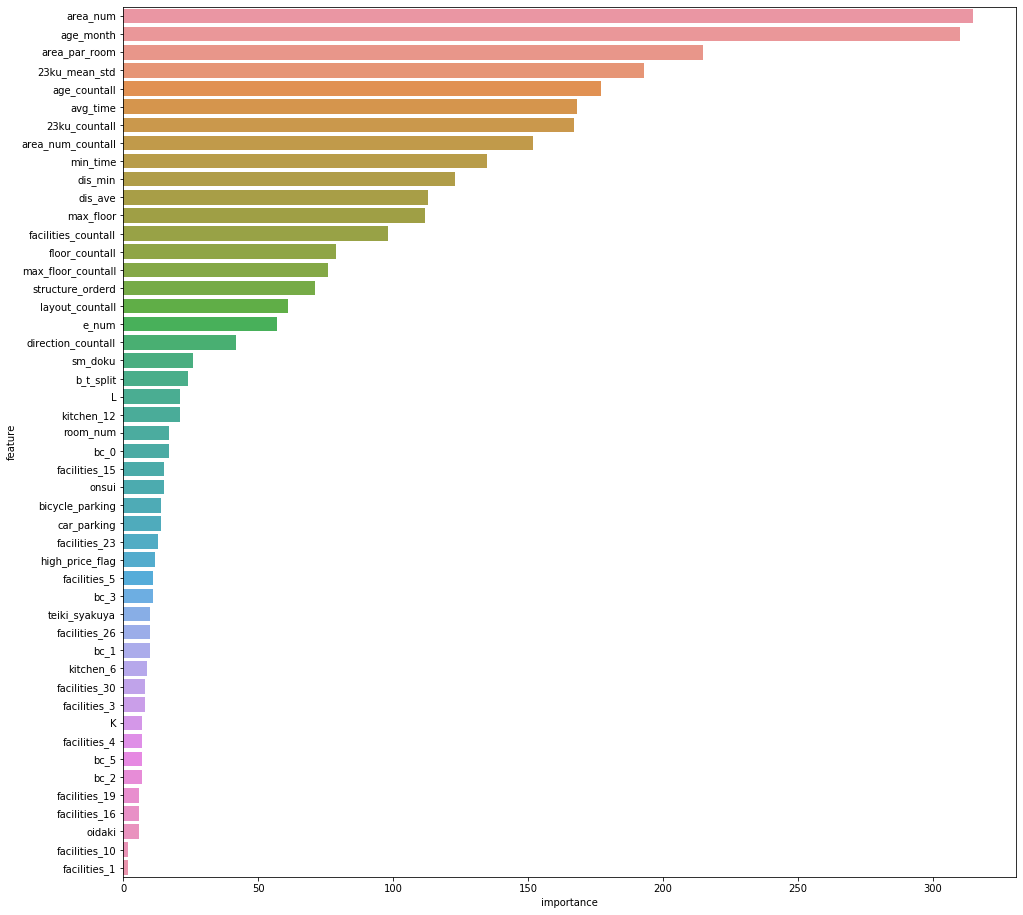

In [35]:
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances, x='importance', y='feature')

In [40]:
feature_importances[feature_importances['importance']>0]

,feature,importance
0,area_num,315
1,age_month,310
19,area_par_room,215
20,23ku_mean_std,193
42,age_countall,177
8,avg_time,168
40,23ku_countall,167
41,area_num_countall,152
7,min_time,135
18,dis_min,123


In [39]:
len(feature_importances[feature_importances['importance']>5])

46